In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # to avoid printout of warnings

In [ ]:
def adjust_gamma(image, gamma=1.0):
    #Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def log_transformation(image):
    # Apply log transformation method
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image.astype("float") + 1))
    # Convert float value to integer
    return np.array(log_image, dtype=np.uint8)

def unsharp(alpha):
    A1 = np.array([[-1,1,-1],[1,1,1],[-1,1,-1]])
    A2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return (alpha*A1+A2)/(alpha+1)

def histogram_equalization_color(image):
    # Convert the image's format from RGB to YCrCb
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    # Equalize the histogram of the Y channel
    image_ycrcb[:,:,0] = cv2.equalizeHist(image_ycrcb[:,:,0])
    # Convert the image's format back to RGB
    return cv2.cvtColor(image_ycrcb, cv2.COLOR_YCrCb2RGB)

def image_histogram(img, title):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title(title)
    plt.subplot(122)
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'best')
    plt.show()

#Standard laplacian kernel
def laplacian_4c():
    kernel = np.zeros((3, 3), np.float32)
    kernel[1, 1] = -4
    kernel[0, 1] = 1
    kernel[1, 0] = 1
    kernel[1, 2] = 1
    kernel[2, 1] = 1
    return kernel

# Laplacian kernel affecting diagonal features
def laplacian_8c():
    kernel = np.ones((3, 3), np.float32)
    kernel[1, 1] = -8
    return kernel

# Sharpening kernel
def sharpen_kernel():
    kernel = -1*np.ones((3,3),np.float32)
    kernel[1,1]=5
    kernel[0,0]=0
    kernel[0,2]=0
    kernel[2,0]=0
    kernel[2,2]=0
    return kernel

#Sharpening kernel affectign diagoanl features
def sharpen_kernel_diag():
    kernel = -1*np.ones((3,3),np.float32)
    kernel[1,1]=9
    return kernel


**Exercise 2**

Propose a method for enhancing the image “nature_dark_forest.jpg”.



---


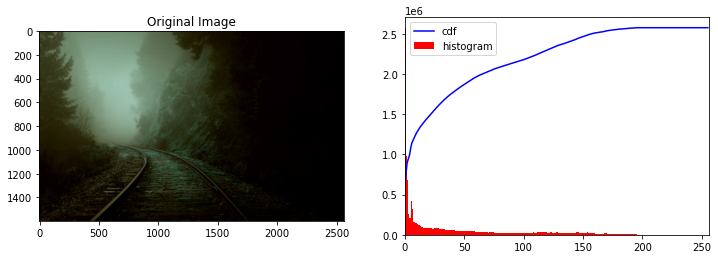

In [ ]:
img = cv2.imread('nature_dark_forest.jpg')

image_histogram(img, "Original Image")

First step is to print the original image and the histogram. As we can also visually observe this image is "low key" and most of the tones occur in the shadows, meaning the left part of the histogram.

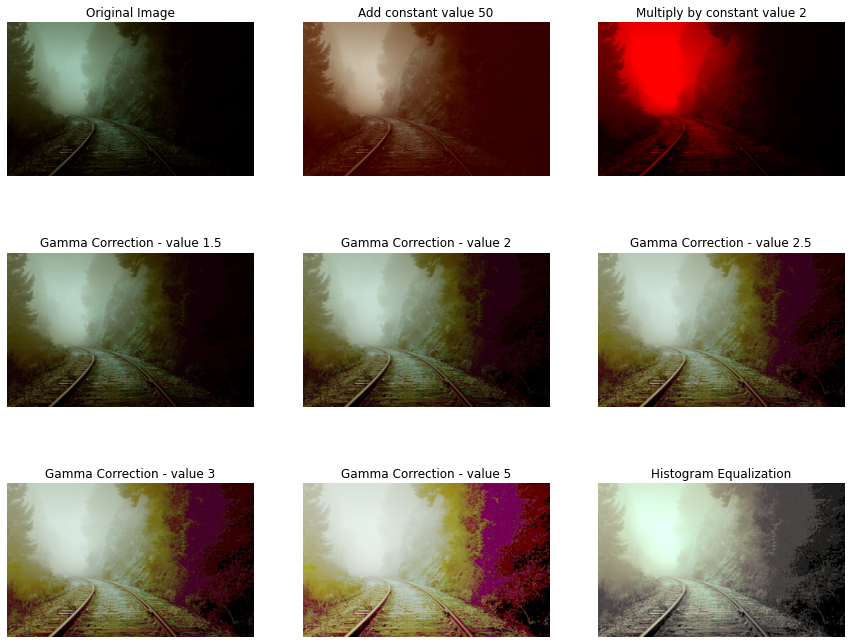

In [ ]:
img = cv2.imread('nature_dark_forest.jpg')

fig, axes = plt.subplots(3, 3, figsize=(15,12))

# Original image
plt.subplot(3, 3, 1), plt.imshow(img), plt.axis('off'), plt.title('Original Image')

# Add transformation
enhanced = cv2.add(img, 50)
plt.subplot(3, 3, 2), plt.imshow(enhanced), plt.axis('off'), plt.title('Add constant value 50')

# Multiply transformation
enhanced = cv2.multiply(img, 2)
plt.subplot(3, 3, 3), plt.imshow(enhanced), plt.axis('off'), plt.title('Multiply by constant value 2')

# Gamma correction for different gamma coefficient values
enhanced = adjust_gamma(img, gamma=1.5)
plt.subplot(3, 3, 4), plt.imshow(enhanced), plt.axis('off'), plt.title('Gamma Correction - value 1.5')

enhanced = adjust_gamma(img, gamma=2)
plt.subplot(3, 3, 5), plt.imshow(enhanced), plt.axis('off'), plt.title('Gamma Correction - value 2')

enhanced = adjust_gamma(img, gamma=2.5)
plt.subplot(3, 3, 6), plt.imshow(enhanced), plt.axis('off'), plt.title('Gamma Correction - value 2.5')

enhanced = adjust_gamma(img, gamma=3)
plt.subplot(3, 3, 7), plt.imshow(enhanced), plt.axis('off'), plt.title('Gamma Correction - value 3')

enhanced = adjust_gamma(img, gamma=5)
plt.subplot(3, 3, 8), plt.imshow(enhanced), plt.axis('off'), plt.title('Gamma Correction - value 5')

# Histogram equalization
enhanced = histogram_equalization_color(img)
plt.subplot(3, 3 ,9), plt.imshow(enhanced), plt.axis('off'), plt.title('Histogram Equalization')

plt.show()

Many methods have been proposed for enhancing the original image, but not all of them produce satisfactory results.

Starting from the first method that simply adds a constant value to each pixel, we chose the value 75 in order to move the tonal range closer to the midtones region. But the image gets more saturated than brighter.
Same happens in the second method too in which instead of adding we multiply by a constant value. Again the original image gets a lot saturated.

The third method is the so called gamma correction, which seems more promising for certain values. Specifically for the values 1.5 and 2 the image appears brighter but without getting overexposed like what happens for bigger values.

The last method is the histogram equalization, by which the output image gets brighter but also "flatter" meaning that it lacks highlights.

Overall, for the given original image the gamma correction method for values of 1.5 and 2 seems to produce the most satisfiable results.

**Exercise 3**

Propose a method for “improving” the image “pollen-500x430px-96dpi.jpg”.


---



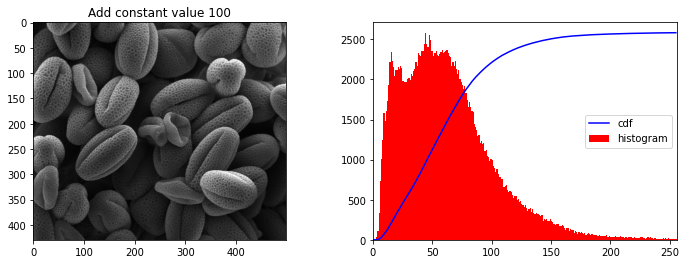

In [ ]:
pollen = cv2.imread('pollen-500x430px-96dpi.jpg',0)
image_histogram(pollen, 'Add constant value 100')

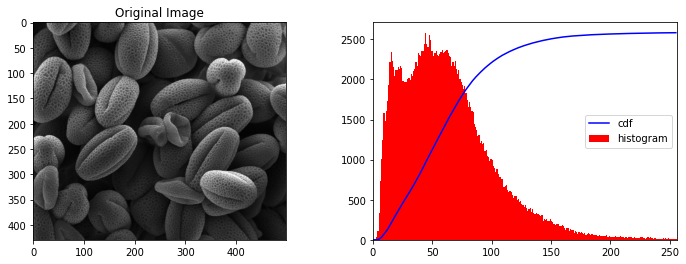

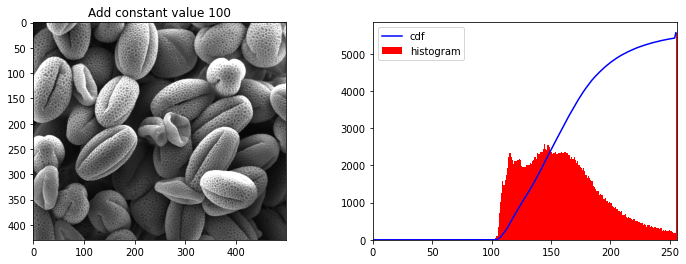

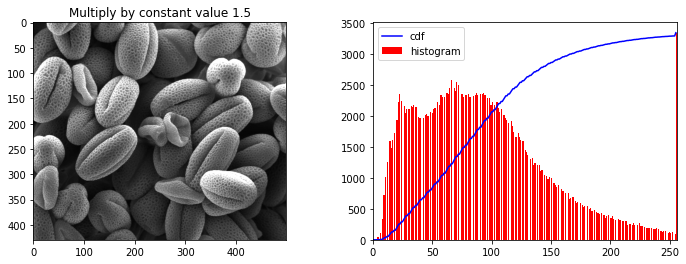

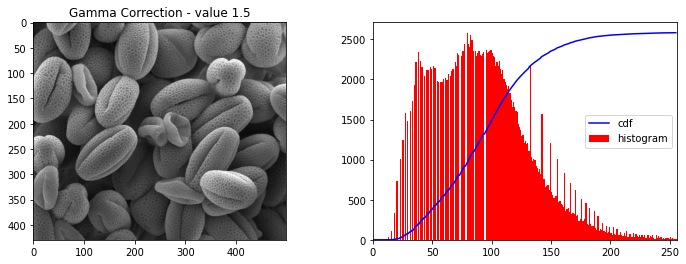

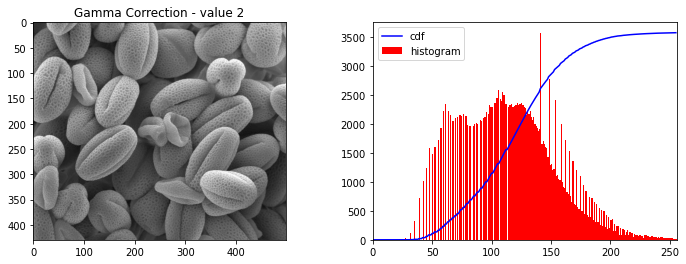

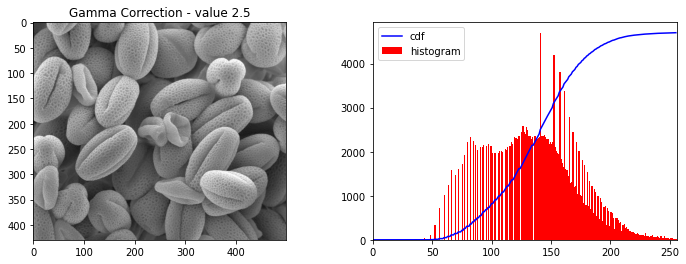

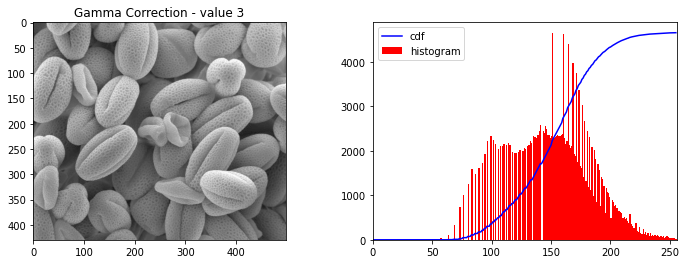

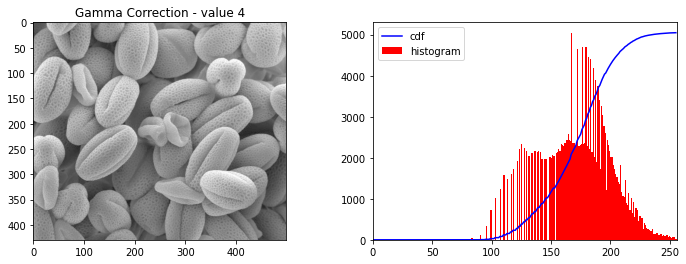

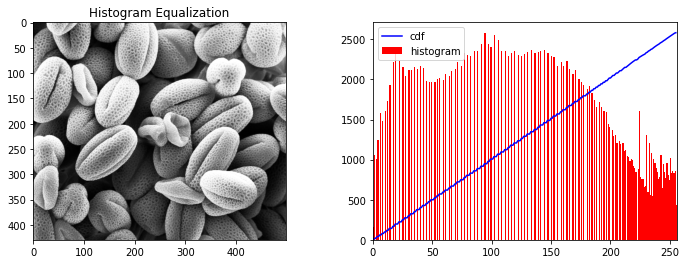

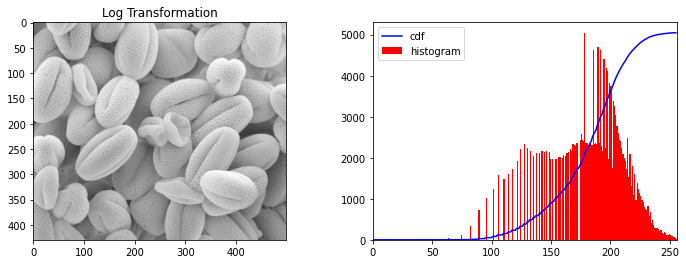

In [ ]:
pollen = cv2.imread('pollen-500x430px-96dpi.jpg',0)

image_histogram(pollen, "Original Image")

# Add transformation
enhanced = cv2.add(pollen, 100)
image_histogram(enhanced, 'Add constant value 100')

# Multiply transformation
enhanced = cv2.multiply(pollen, 1.5)
image_histogram(enhanced, 'Multiply by constant value 1.5')

# Gamma correction for different gamma coefficient values
enhanced = adjust_gamma(pollen, gamma=1.5)
image_histogram(enhanced,'Gamma Correction - value 1.5')

enhanced = adjust_gamma(pollen, gamma=2)
image_histogram(enhanced,'Gamma Correction - value 2')

enhanced = adjust_gamma(pollen, gamma=2.5)
image_histogram(enhanced,'Gamma Correction - value 2.5')

enhanced = adjust_gamma(pollen, gamma=3)
image_histogram(enhanced,'Gamma Correction - value 3')

enhanced = adjust_gamma(pollen, gamma=4)
image_histogram(enhanced,'Gamma Correction - value 4')

# Histogram equalization
enhanced = cv2.equalizeHist(pollen)
image_histogram(enhanced,'Histogram Equalization')

# Log transformation
enhanced = log_transformation(pollen)
image_histogram(enhanced,'Log Transformation')

The original image as we can observe is quite dark, so it's a bit harder for someone to recognise that it depicts pollen. We can also confirm the image's underexposure by inspecting the histogram, where the tonal range is narrow and shifted to the left. This means that in order to "improve" the image and make it look brighter, our goal is to spread the tonal range to the right where brighter tones exist.

The first method used is quite simple and adds a constant value to each pixel.
For the given image of pollen, the fixed positive value of 100 does brighten the original image but some small parts of the pollen (like in the right bottom corner) are so overexposed that appear solid white. This is also confirmed in the histogram by the clipped highlight that has been created in the right side, because some pixels exceeded the limit of 255 for uint8 representation.

The second method is quite simple again and is based on multiplying each pixel by a constant value. For the chosen constant value of 1.5 the image gets brighter too. In the histogram the intensity values have been streched out uniformly but again a clipped highligh has been created.

The third method being used is the gamma correction, also known as the Power Law Transform. In order to enhance the brightness of the original image, 5 gamma values greater than 1 have been tested. As we can observe both visually and by using the histograms, the higher the gamma value the higher the brightness of the image, but in comparison with previous methods, no clipped highlights were formed. The values of 2 and 2.5 seem to be the ones that produce the most satisfiable results, meaning that the image gets brighter but without losing information about most of the details.

The fourth method is named histogram equalization which method spreads out the most frequent intensity values by increasing the global contrast of images. As we can see, both the brightness and contrast of the original image have been enhanced.

The last method relies on using the log function to replace all pixel values, present in the image, with its logarithmic values. Log transformation is a common method for image enhancement as it expands dark pixels of the image. As we can notice from the histogram, the tonal range has been spread out and also shifted to the highlights region resulting to a very bright output image.

Depending on the application and the characteristics of the original image the afore-mentioned methods or even a combination of them can be used. Since the goal of the exercise is not strictly defined, we can visually inspect the image and select the method which clearer displays the patterns. In the case of pollen image, we suggest the gamma correction method with values 2 and 2.5 as discussed previously.

**Exercise 4**

Propose a method for sharpening the image “First-photo-of-the-moon-from-Chandrayaan2_ISRO.jpg”.


---



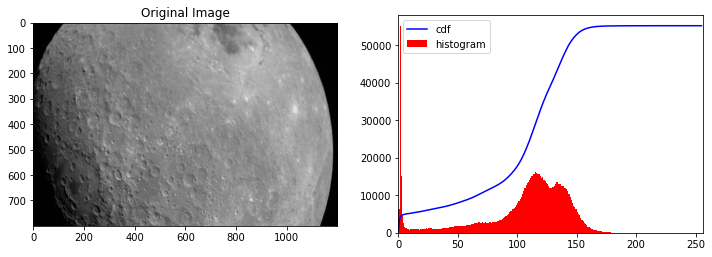

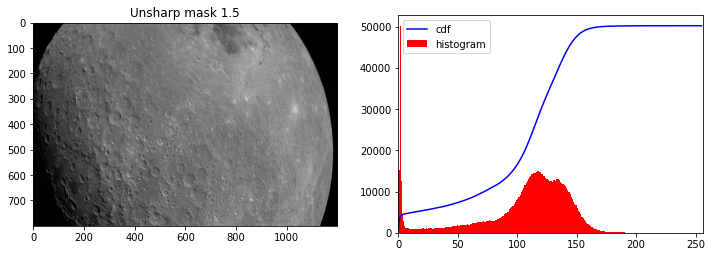

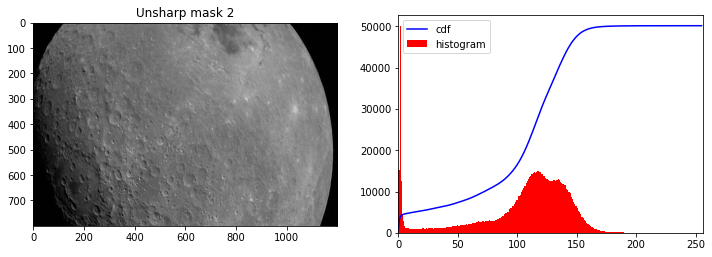

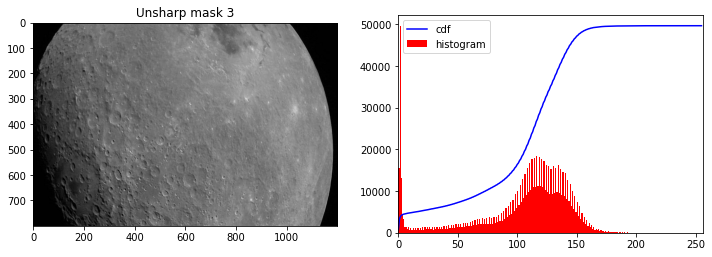

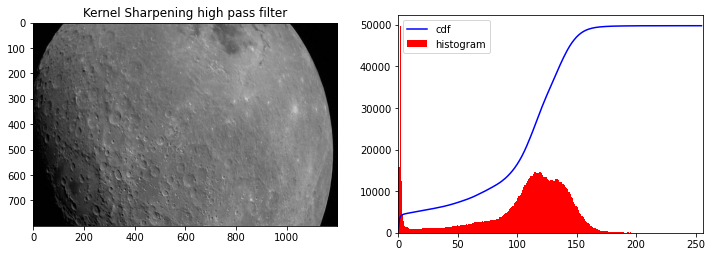

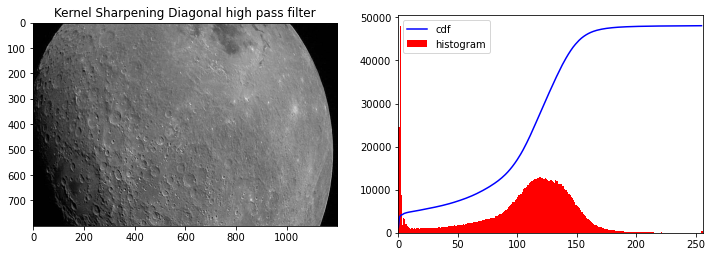

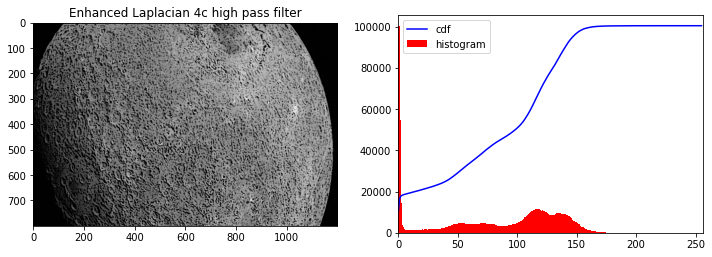

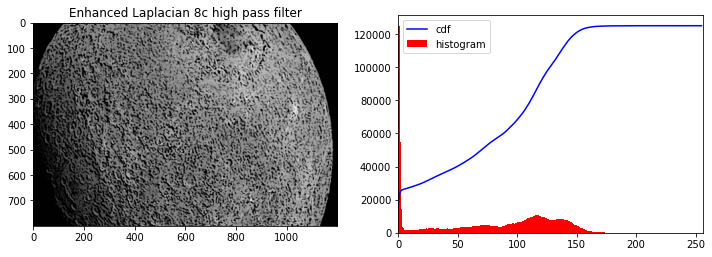

In [ ]:
# open image with cv2 library and in gray scale mode.
moon = cv2.imread("First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg",0)

# plot the original image
image_histogram(moon, "Original Image")

#unsharp mask
kernel = unsharp(1.5)
sharpened = cv2.filter2D(moon, -1, kernel, borderType=cv2.BORDER_REPLICATE)
image_histogram(sharpened,'Unsharp mask 1.5')

kernel = unsharp(2)
sharpened = cv2.filter2D(moon, -1, kernel, borderType=cv2.BORDER_REPLICATE)
image_histogram(sharpened,'Unsharp mask 2')

kernel = unsharp(3)
sharpened = cv2.filter2D(moon, -1, kernel, borderType=cv2.BORDER_REPLICATE)
image_histogram(sharpened,'Unsharp mask 3')

# find the details of the image using kernel filter for specialized for sharpening
# not taking into account diagonal elements, with replicate border
sharpened = cv2.filter2D(moon, -1, sharpen_kernel(), borderType=cv2.BORDER_REPLICATE)
image_histogram(sharpened,'Kernel Sharpening high pass filter')

# find the details of the image using kernel filter for specialized for sharpening
# taking into account also diagonal elements, with replicate border
sharpened = cv2.filter2D(moon, -1, sharpen_kernel_diag(), borderType=cv2.BORDER_REPLICATE)
image_histogram(sharpened,'Kernel Sharpening Diagonal high pass filter')

# find the details of the image using laplacian filter 4c, with replicate border
laplacian_4 = cv2.filter2D(moon, -1, laplacian_4c(), borderType=cv2.BORDER_REPLICATE)
# enhancing laplacian 4c to enhance sharpening
sharpened = cv2.multiply(laplacian_4, 60)
sharpened = cv2.medianBlur(sharpened, 5)

sharpened = cv2.subtract(moon, sharpened)
image_histogram(sharpened,'Enhanced Laplacian 4c high pass filter')

# find the details of the image using laplacian filter 8c, with replicate border
laplacian_8 = cv2.filter2D(moon, -1, laplacian_8c(), borderType=cv2.BORDER_REPLICATE)
# enhancing laplacian 8c to enhance sharpening
sharpened = cv2.medianBlur(laplacian_8, 7)
sharpened = cv2.multiply(sharpened, 40)

sharpened = cv2.subtract(moon, sharpened)
image_histogram(sharpened,'Enhanced Laplacian 8c high pass filter')


To execute the sharpening of the given image we used the following kernels ...

Sharpening Kernel:

$$
\left[\begin{array}
{rrr}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{array}\right]
$$

Sharpening diagonal Kernel:

$$
\left[\begin{array}
{rrr}
-1 & -1 & -1 \\
-1 & -8 & -1 \\
-1 & -1 & -1
\end{array}\right]
$$

Laplacian 4c:

$$
\left[\begin{array}
{rrr}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{array}\right]
$$

Laplacian 8c:

$$
\left[\begin{array}
{rrr}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{array}\right]
$$


By sharpening in image processing we basically mean increasing contrast along the edges in your image. Increasing the contrast of the image reflects to broadening the histogram.

First applied method was unsharp masking, which is quite simple and relies on subtracting a scaled “unsharp” version of the image from the original. As we can notice both visually and from the histograms no apparent changes were made in the output image compared to the original one.

The second method was high pass filter, which actually keeps the high frequency values in the image while reducing the low frequency ones. For this reason the kernel array is defined to contain a single positive value at its center, which is completely surrounded by negative values. The sharpening in the output image is not very "intense". Same goes for the histogram which shape didn't apparently change.

The third method resembles the previous one but gives emphasis on diagonal features. By taking a look at the image and the histogram we can conclude that the image appears sharper than previosuly.

The last method applies Laplacian Operators which use second order derivative mask in order to measure the rate at which the first derivatives change and to highlight the regions where the pixel intensities dramatically change.
The first Laplacian filter is invariant to 90◦ rotation and as we can firstly visually inspect the sharpening of the original image is obvious and more "intense" than all the previous methods. Also the tonal range in the histogram has been spread out which means that the constrast of the image has been increased.

The second filter is invariant to 45◦ rotation and the sharpening is even more intense than in the previous case. Also the histogram has broader tonal range.

Overall, as long as in the exercise it has not been specifically defined the desired intensity of sharpening, all methods are valid and can be suitable depending on the application.
Aesthetically, the method we propose from our side is the high pass affecting the diagonal features, because sharpening is obvious and hasn't changed the content of the image.